In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sb
import yfinance as yf

sb.set_theme()  

DEFAULT_START = dt.date.isoformat(dt.date.today() - dt.timedelta(365))
DEFAULT_END   = dt.date.isoformat(dt.date.today())

class Stock:
    def __init__(self, symbol, start=DEFAULT_START, end=DEFAULT_END):
        self.symbol = symbol
        self.start  = start
        self.end    = end
        self.data   = self.get_data()     # <-- this calls the method defined below

    def get_data(self):
        
        df = yf.download(self.symbol, start=self.start, end=self.end, progress=False)
        
        if 'Adj Close' in df.columns:
            df = df[['Adj Close']].rename(columns={'Adj Close': 'close'})
        else:
            df = df[['Close']].rename(columns={'Close': 'close'})
        
        df.index = pd.to_datetime(df.index)
        
        df = self.calc_returns(df)
        return df

    def calc_returns(self, df):
        """Add change and log instantaneous return columns and return df."""
        df['change'] = df['close'].diff()
        df['instant_return'] = np.log(df['close']).diff().round(4)
        return df

    def plot_return_dist(self):
        """Histogram of instantaneous (log) returns."""
        plt.figure(figsize=(8, 5))
        plt.hist(self.data['instant_return'].dropna(), bins=30, edgecolor='k')
        plt.title(f"{self.symbol} - Histogram of Daily Log Returns")
        plt.xlabel("Daily log return")
        plt.ylabel("Frequency")
        plt.show()

    def plot_performance(self):
        """Line chart of cumulative performance (percent gain/loss)."""
        perf = self.data['close'] / self.data['close'].iloc[0] - 1.0
        plt.figure(figsize=(10, 5))
        plt.plot(perf.index, perf * 100)
        plt.title(f"{self.symbol} - Performance Over Time")
        plt.xlabel("Date")
        plt.ylabel("Gain/Loss (%)")
        plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()


C:\Users\aleja\AppData\Local\Temp\ipykernel_6912\3812809324.py:23: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, start=self.start, end=self.end, progress=False)


Price            close    change instant_return
Ticker            AAPL                         
Date                                           
2024-10-07  220.663025       NaN            NaN
2024-10-08  224.724152  4.061127         0.0182
2024-10-09  228.476654  3.752502         0.0166
2024-10-10  227.978973 -0.497681        -0.0022
2024-10-11  226.495895 -1.483078        -0.0065


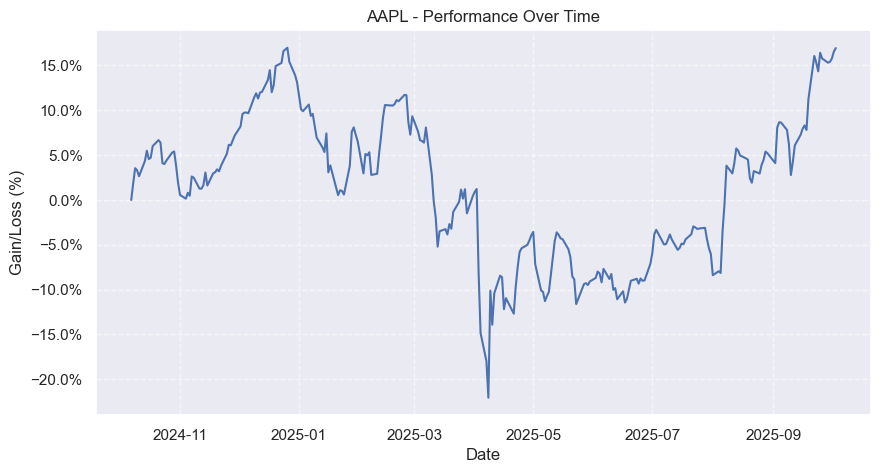

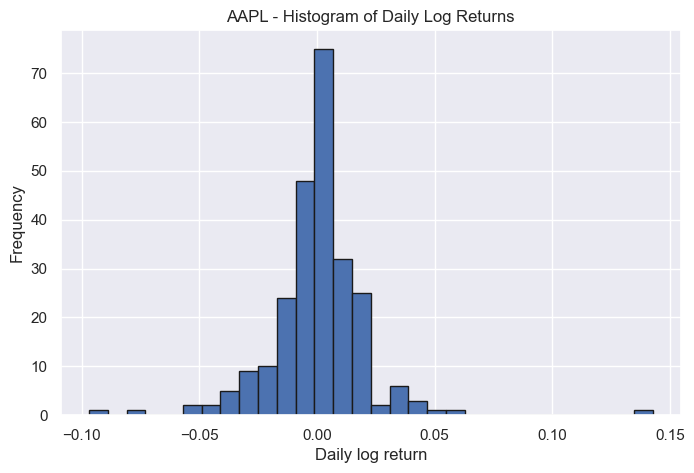

In [2]:
def main():
   
    test = Stock(symbol='AAPL')
    print(test.data.head())     
    test.plot_performance()     
    test.plot_return_dist()     

if __name__ == '__main__':
    main()
